# Estimation statistique avancée
# Adrien HANS & Tanguy JEANNEAU
# Simulations de Variables Aléatoires


In [3]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

On peut calculer les moyennes empiriques/variances.... 

## 1 : A partir de l’inverse généralisée de la fonction de répartition

Ici, la fonction de répartition de X est égale à : 

\begin{align*}
F(x) = 1 - exp(-\lambda x)
\end{align*}

1) Après calcul, l'inverse généralisée de F est égale à  : 
\begin{align*}
F^{-1}(u) = - \frac{ln(1-u)}{\lambda}
\end{align*}

2) On utilise la méthode de l'inverse généralisée pour simuler 10 000 échantillons issus d'une loi exponentielle avec $\lambda = 2$. 

In [29]:
Lambda=2
nbEchantillon = 10000
U=uniform.rvs(loc=0.0,scale=1.0,size=nbEchantillon)
X=(-1/Lambda)*np.log(1-U)

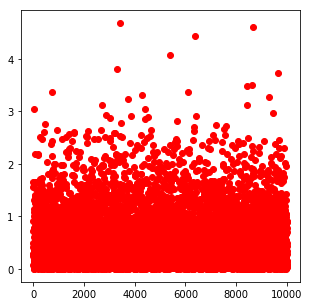

In [32]:
#On affiche le résultat: 
fig=plt.figure(figsize=(5,5))
plt.scatter(np.arange(0,10000),X,color='r')
plt.show()

3) On trace sur une autre figure la courbe de densité de probabilité normalisée de X :

In [6]:
x_dens=np.arange(0,5,0.01)
densite_X=Lambda*np.exp(-Lambda*x_dens)

<Figure size 432x288 with 0 Axes>

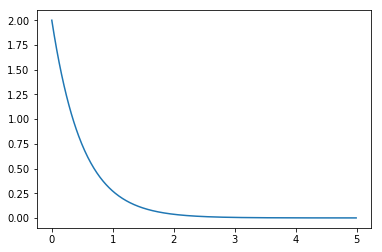

In [7]:
fig=plt.figure()
plt.plot(x_dens,densite_X)
plt.show()

4) On trace l'histogramme normalisé des échantillons de la première question.

C:\Users\adrien\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


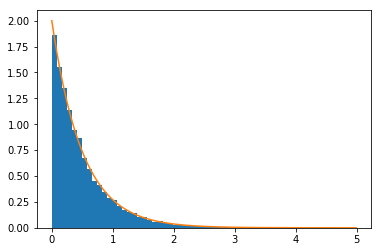

In [8]:
plt.hist(X,bins=50,normed=True)
plt.plot(x_dens,densite_X)
plt.show()

**On peut calculer certaines propriétés des 10 000 échantillons précédemment simulés : **

In [9]:
print('Moyenne Empirique :' , np.mean(X))
print('Variance Empirique :' , np.var(X))

Moyenne Empirique : 0.496315160459
Variance Empirique : 0.246113385345


5) Principale limitation de cette méthode : 
- Il faut connaitre l'inverse généralisée de F pour pouvoir générer les nombres aléatoires. 

## 3 : Méthode de Box-Muller pour des lois normales univariées : 

1. Mettre en œuvre la m´ethode de Box-Muller pour ´echantillonner 10000 ´echantillonssuivant une loi normale centr´ee r´eduite. Tracer le r´esultat.


In [6]:
#nombre d'echantillons : 
nbEchantillon = 10000
#calcul de U1 :
U1=uniform.rvs(loc=0.0,scale=1.0,size=nbEchantillon)
#Calcul de U2 :
U2=uniform.rvs(loc=0.0,scale=1.0,size=nbEchantillon)
#calcul de R:
R=-2*np.log(U1)
#calcul de V :
V=2*np.pi*U2
#calcul de z1 :
Z1=np.sqrt(R)*np.cos(V)
#calcul de z2 :
Z2=np.sqrt(R)*np.sin(V)

On affiche le résultat : 

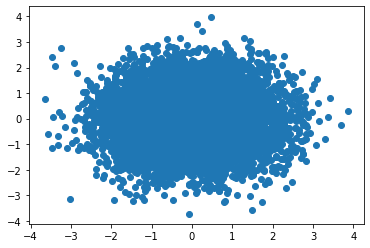

In [8]:
plt.scatter(Z1,Z2)
plt.show()

2. Tracer sur une autre figure la courbe de la densit´e de probabilit´e normalis´ee de X.

In [12]:
#Définition de Z:
Z=[Z1,Z2]
#Densité de probabilité de Z: 
fz=(1/np.sqrt(2*np.pi))*np.exp((np.dot(-np.transpose(Z),Z))/2)

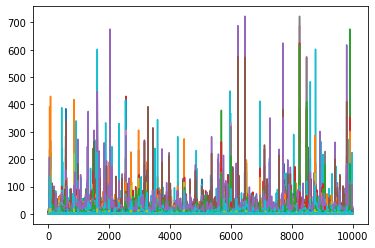

In [13]:
plt.plot(fz)
plt.show()

## 5 : Echantilloner suivant une loi de Bernoulli : 
1) On génère 1000 échantillons suivant une loi de Bernoulli de paramètre p=0.7 puis on trace le résultat : 

In [23]:
p=0.7
nbEchantillon = 1000
#On génère 1000 nombres pseudo-aléatoires uniforme entre 0 et 1 : 
U=uniform.rvs(loc=0.0,scale=1.0,size=nbEchantillon)
X=[]
for u in U:
    if u<p:
        X.append(0)
    else:
        X.append(1)

Etant donné la nature de l'échantillon, l'affichage le plus adapté est l'histogramme : 

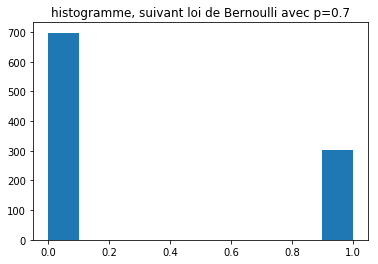

In [24]:
fig=plt.figure()
plt.hist(X)
plt.title('histogramme, suivant loi de Bernoulli avec p=0.7')
plt.show()

2) On calcule la fréquence du nombre de zéros générés : 

In [26]:
print('fréquence du nombre de zéros générés : ' , X.count(0)/nbEchantillon)

fréquence du nombre de zéros générés :  0.698


In [27]:
print('Moyenne empirique : ', np.mean(X))
print('Variance empirique : ', np.var(X))

Moyenne empirique :  0.302
Variance empirique :  0.210796


On retrouve le paramètre de la loi de Bernoulli à $10^{-3}$ près. 

##  6) Les méthodes Monte Carlo Markov Chain : MCMC
### Algorithme de MH
#### Influence du support de la loi de proposition

In [14]:
#Nombred d'échantillons : 
nbEchantillon=20000
#Loi de proposition : 
U=uniform.rvs(loc=-1.0,scale=2.0,size=nbEchantillon)
#burn-in : 
burn=500
#On calcule à partir d'une loi normale de moyenne nulle et de variance unité : 
def f(x):
    return()
def rho(x,y):
    return np.min((f(y)*q(x))/(f(x)*q(y)),1)
#initialisation du vecteur d'échantillons :
X=[]
for i in range(nbEchantillon):
    while x!=f(x):
        rho(x,Y[i])
        #utiliser une loi binomiale de paramètre n=1 pour se ramner à une loi de Brnoulli et p=rho: 
        x=rd.binomiale(1,rho)
    #On ajoute la nouvelle valeur de x au vecteur :    
    X.append(x)
#On enlève les échantillons non-considérés (burn-in):
X=X[burn:]


SyntaxError: invalid syntax (<ipython-input-14-b66ee3bc0d90>, line 17)